In [1]:
%matplotlib inline
from IPython.display import Image
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 4)
import main
import parameters as pm

# Project 2




## Description of model

Ocean gyres and the Gulf Stream are important oceanic features which occur as a response to wind stress. The Gulf Stream is an example of a western boundary current in the Atlantic Ocean. In order to understand these features, a closed ocean basin subject to wind stress can be modelled. The model of Stommel (1948) is the simplest dynamical model able to represent a wind-driven circulation in a closed ocean basin, including a western boundary current. This model is described by the shallow water equations, linearised about a resting state, with linear drag and wind stress. The equations are listed below:

$$\frac{\partial \eta}{\partial t} + H \nabla . \mathbf{V}  \qquad (1)$$
$$\frac{\partial \mathbf{V}}{\partial t} + (f_0 + \beta y)\mathbf{k} \times \mathbf{V} = -g\nabla \eta - \gamma \mathbf{V} + \frac{\mathbf{\tau}}{\rho H}     \qquad (2)$$ 

where the prognostic variables are the surface elevation $\eta (\mathbf{x},t)$ and the depth-averaged horizontal velocity $\mathbf{V}(\mathbf{x},t)$. Here, $\mathbf{x}(x, y)$ is the 2D spatial coordinate and $\mathbf{k}$ is a unit vector in the vertical.

Equations (1) and (2) are subject to no-normal flow (kinematic) boundary conditions. The computational domain is a square defined by the ranges [$0,L$] $\times$ [$0,L$].

Initially the flow is at rest and velocity ($u, v$) and elevation ($\eta$) are zero throughout the domain.

The wind stress vector $\mathbf{\tau}$ is described below:

$$\tau = \begin{pmatrix} \tau_x \\ \tau_y \end{pmatrix} = \tau_0 \begin{pmatrix} -cos(\frac{\pi y}{L}) \\ 0 \end{pmatrix}  \qquad (3)$$

The variables used in the model (assigned in <i>parameters.py</i>) are described below, along with their physical interpretation:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-yw4l">Model variable</th>
    <th class="tg-yw4l">Symbol and physical interpretation</th>
  </tr>
  <tr>
    <td class="tg-yw4l">H</td>
    <td class="tg-yw4l">$H$: the resting depth of the fluid which is assumed to be constant</td>
  </tr>
  <tr>
    <td class="tg-yw4l">f0 and beta</td>
    <td class="tg-yw4l">$f_0 + \beta y$: the approximation to the Coriolis parameter on a $\beta$-plane</td>
  </tr>
  <tr>
    <td class="tg-yw4l">g</td>
    <td class="tg-yw4l">$g$: gravitational acceleration</td>
  </tr>
  <tr>
    <td class="tg-yw4l">gamma</td>
    <td class="tg-yw4l">$\gamma$: linear drag coefficient</td>
  </tr>
  <tr>
    <td class="tg-yw4l">roe</td>
    <td class="tg-yw4l">$\rho$: uniform density</td>
  </tr>
  <tr>
    <td class="tg-yw4l">tau</td>
    <td class="tg-yw4l">$\tau$: wind stress acting on the surface of the fluid</td>
  </tr>
  <tr>
    <td class="tg-yw4l">tau0</td>
    <td class="tg-yw4l">$\tau_0$: wind stress parameter</td>
  </tr>
  <tr>
    <td class="tg-yw4l">L</td>
    <td class="tg-yw4l">$L$: length of ocean basin</td>
  </tr>
  <tr>
    <td class="tg-yw4l">d</td>
    <td class="tg-yw4l">$d$: grid-length</td>
  </tr>
  <tr>
    <td class="tg-yw4l">nx</td>
    <td class="tg-yw4l">$nx$: number of points on the x and y coordinate</td>
  </tr>
  <tr>
    <td class="tg-yw4l">dt</td>
    <td class="tg-yw4l">$\Delta t$: timestep</td>
  </tr>
  <tr>
    <td class="tg-yw4l">nt</td>
    <td class="tg-yw4l">$nt$: number of timesteps</td>
  </tr>
  <tr>
    <td class="tg-yw4l">n</td>
    <td class="tg-yw4l">$\eta$: elevation</td>
  </tr>
  <tr>
    <td class="tg-yw4l">u</td>
    <td class="tg-yw4l">$u$: $x$ component of velocity</td>
  </tr>
  <tr>
    <td class="tg-yw4l">v</td>
    <td class="tg-yw4l">$v$: $y$ component of velocity</td>
   </tr>
</table>

The values of these variables can be found in <i>parameters.py</i>. The model can be run by calling the function <i>main()</i> in <i>main.py</i>.

## Task A

According to lecture notes, the Rossby deformation radius is given by:

$$R_d = \frac{\sqrt{gH}}{f_0}  \qquad (4)$$

Using values in <i>parameters.py</i>, we have $R_d = \frac{\sqrt{10 \times 1000}}{10^{-4}} = 10^6$ (Evaluated below).

In this scenario, inertia-gravity waves are considered. These waves propagate fast and the maximum wave phase speed that is anticipated from these waves is $141 m s^{-1}$ in the diagonal direction ($45^{\circ}$ to the x-axis and y-axis). This suggests that we may need to use a fine grid for the model ($d << R_d$).

The threshold of $\frac{R_d}{d} > 10$ is set for the fine grid regime (from lecture notes). Using $d =$ 40000 $m$, this gives $\frac{R_d}{d} = 25$, which is above the threshold.

If the maximum wave phase speed is 141 $m s^{-1}$ in the diagonal direction, this means that $u_{max} = v_{max} =$ 100 $m s^{-1}$.

The Courant-Friedrichs-Lewy (CFL) condition in 2D is shown below:

$$ C = \frac{u \Delta t}{\Delta x} + \frac{v \Delta t}{\Delta y} = \frac{u \Delta t}{d} + \frac{v \Delta t}{d} \leq 1 \qquad (5)$$

Hence, the upper bound on the timestep to use in the model can be calculated:

$$ \Delta t \leq \frac{d}{u + v} \qquad (6)$$

The above values of $d$, $u$ and $v$ results in $\Delta t \leq \frac{40000}{100 + 100} = 200 s$. To be certain that the CFL condition is met, the timestep $\Delta t$ of $150s$ is used in this model.

Finally, given that the fine grid regime is used as described above, the Arakawa C-grid in space performs the best based on the comparison of the dispersion relation on the C-grid to the exact dispersion relation for inertia-gravity waves (according to lecture notes) and will be used in this model. The Arakawa C-grid is drawn below.

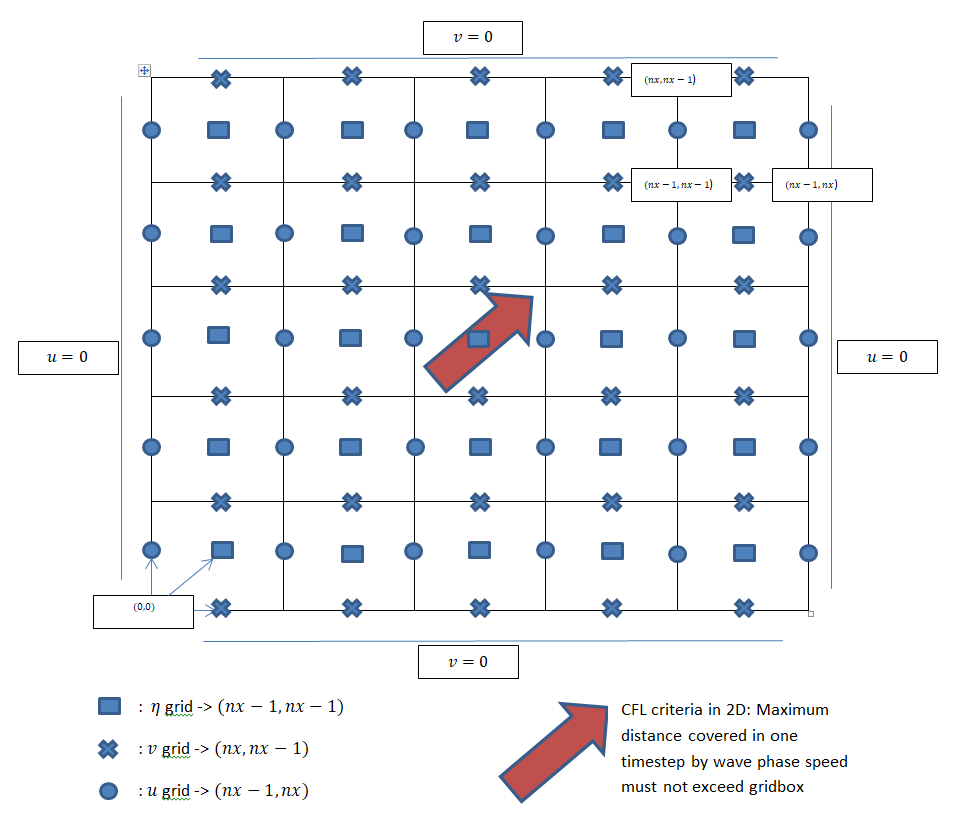

In [2]:
Image(filename="C:\Users\Joshua\Desktop/Grid.png")

In [3]:
pm.calc_Rd(pm.pm['g'],pm.pm['H'],pm.pm['f0'])

1000000.0

## Task B

A finite difference model based on Equations (1) and (2) is constructed on the Arakawa C-grid in space with the forward-backward time scheme (Matsuno, 1966; Beckers and Deleersnijder, 1993). The algorithm can be found in these papers, which involve alternating the order in which the two momentum equations are solved. The model is run for a day ($\Delta t = 150s$, $nt = 576 => 86400s \approx 1$ day) below.

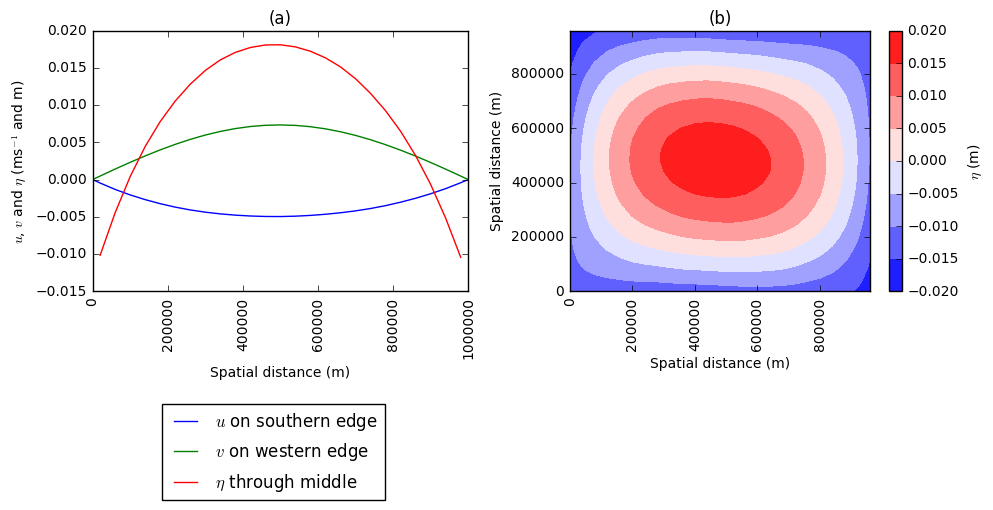

In [2]:
main.main(TaskB = True)

Figure 1: (a) Plot of $u$ against $x$ along the grid closest to the southern edge of the basin, $v$ against $y$ along the grid closest to the western edge of the basin, $\eta$ against $x$ through the middle of the gyre and (b) contour plot of $\eta$ in the ocean basin. Model is run for 1 day ($nt = 576$, $\Delta t = 150s$) with $L = 10^6$, $d = 40000m$, $H = 1000m$, $g = 10 ms^{-2}$, $\gamma = 10^{-6}s^{-1}$, $\rho = 1000 kgm^{-3}$, $\tau_0 = 0.2 Nm^{-2}$ with boundary conditions and initial conditions stated in description of model.

The results show a stable solution within the ocean basin. $v$ is positive along the western edge of the basin, while $u$ is negative along the southern edge of the basin, hence there is a smooth clockwise gyre within the basin. The contour plot shows the elevation $n$ with the highest value in the centre of the ocean basin. The wind stress vector drives the flow and by mass conservation, the clockwise gyre is formed. In this short period of time, a western boundary current has not been observed yet and the gyre is still relatively symmetric.

## Task C

The total energy of the perturbation from the resting ocean can be calculated using:

$$E(u,v,\eta) = \int_0^L \int_0^L \frac{1}{2}\rho(H(u^2 + v^2) + g\eta^2)\,dx\,dy   \qquad (7)$$

where, $u$, $v$ and $\eta$ are values on the $\eta$-grid.

The energy is plotted at each timestep and shown below.

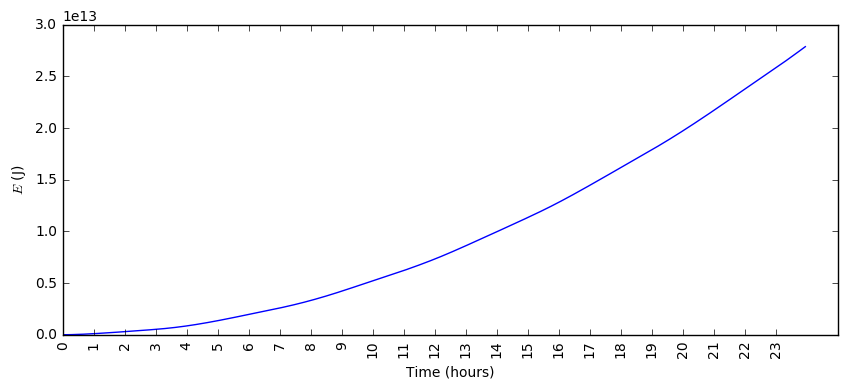

In [2]:
main.main(TaskC1 = True)

Figure 2: Plot of total energy ($E$) from the perturbation of the resting ocean against time. Model is run for 1 day ($nt = 576$, $\Delta t = 150s$) with $L = 10^6$, $d = 40000m$, $H = 1000m$, $g = 10 ms^{-2}$, $\gamma = 10^{-6}s^{-1}$, $\rho = 1000 kgm^{-3}$, $\tau_0 = 0.2 Nm^{-2}$ with boundary conditions and initial conditions stated in description of model.

When the model is run for 1 day, the total energy of the perturbation from the resting ocean increases almost linearly with time. This suggests that choosing the fine scale regime allows the model to spin up from rest given the wind forcing. It also shows that the solution does not blow up exponentially because the CFL criterion is met. At this stage, the western boundary current has not been formed yet (seen in Task B) and hence the total energy in the ocean basin is still increasing. The model is run below until it reaches a steady state, when the total energy has approximately reached a constant value.

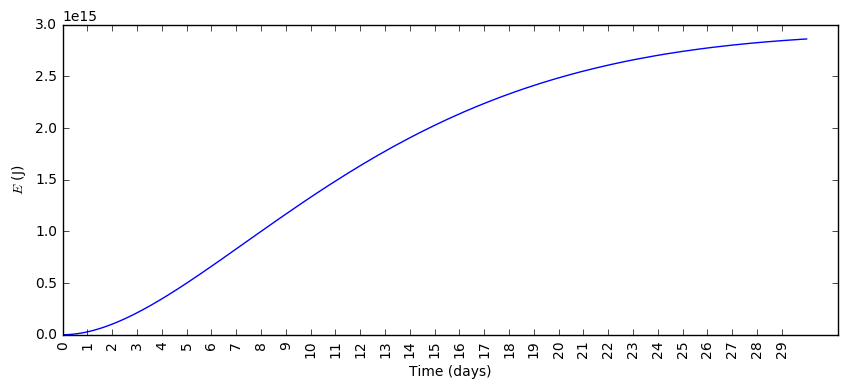

In [2]:
pm.pm['nt'] = 576*30
main.main(TaskC2 = True)

Figure 3: Plot of total energy ($E$) from the perturbation of the resting ocean against time. Model is run for 30 days ($nt = 576 \times 30$, $\Delta t = 150s$) with $L = 10^6$, $d = 40000m$, $H = 1000m$, $g = 10 ms^{-2}$, $\gamma = 10^{-6}s^{-1}$, $\rho = 1000 kgm^{-3}$, $\tau_0 = 0.2 Nm^{-2}$ with boundary conditions and initial conditions stated in description of model.

After 30 days, the model reaches an approximate steady state, and the total energy does not increase with time (Figure 3). This corresponds to the formation of a steady gyre which has a steady western boundary current (Task D). The total energy of the system stops increasing because the sources of energy by the wind forcing are balanced by the sinks in energy near the boundaries of the basin.  

## Task D

Mushgrave (1985) derived an analytical solution for Equations (1) and (2) for the steady state. The equations for $u_{st}$, $v_{st}$ and $\eta_{st}$ can be found in the paper. The final value of $\eta (0, \frac{L}{2})$ after the model reaches a steady state is used as an estimate of $\eta_0$ required in the steady state equations. 

Using $u' = u - u_{st}$, $v'= v - v_{st}$ and $\eta' = \eta - \eta_{st}$, the energy difference $E(u',v',\eta')$ between the model in the steady state and the analytical solution for the steady state is calculated below (Figure 5). Also, the comparison between the model in the steady state and analytical solution for the steady state is shown below (Figure 4).

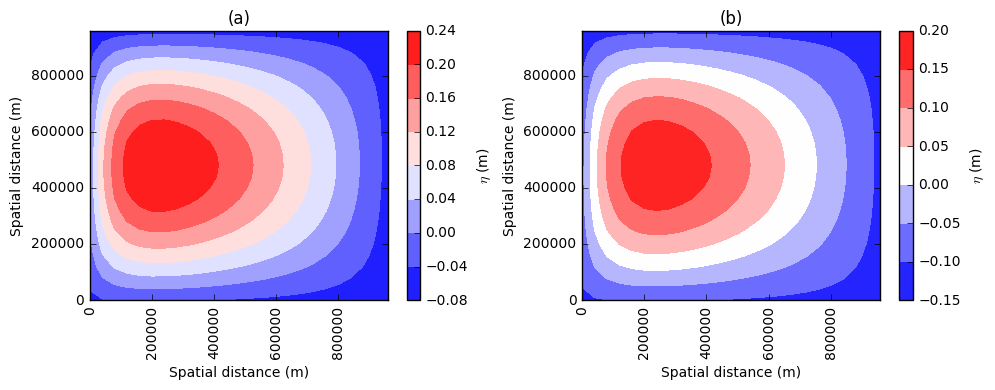

In [2]:
main.main(TaskD3 = True)

Figure 4: Contour plot of (a) the steady state analytical solution from Mushgrave (1985) and (b) steady state model solution of $\eta$ in the ocean basin. Model is run for 1 day ($nt = 576 \times 30$, $\Delta t = 150s$) with $L = 10^6$, $d = 40000m$, $H = 1000m$, $g = 10 ms^{-2}$, $\gamma = 10^{-6}s^{-1}$, $\rho = 1000 kgm^{-3}$, $\tau_0 = 0.2 Nm^{-2}$ with boundary conditions and initial conditions stated in description of model.

Figure 4 shows that the model in the steady state is very similar to the analytical solution for the steady state. Both plots show a steady gyre with $\eta_{max}$ close to the western boundary of the basin. The gradient of $\eta$ near the western boundary is sharp, so this suggests that the western boundary current (which depends on the gradient of $\eta$) has formed in the steady state. The main difference between the two plots are the magnitude of $\eta_{max}$ and $\eta_{min}$ values. The magnitude of $\eta_{max}$ is slightly higher in the analytical solution, and the magnitude of $\eta_{min}$ is slightly lower in the analytical solution. This results in a small energy difference using the formula in Task C. The energy difference between the two solutions is calculated (Figure 5) to investigate the impact of increasing the model resolution.

The energy calculated from the difference fields is 3.22121167959e+13 J


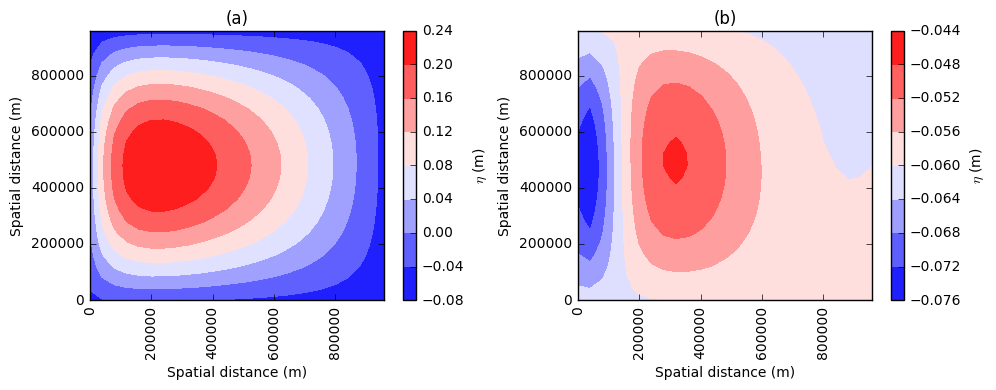

In [2]:
main.main(TaskD1 = True, TaskD = True)

Figure 5: Contour plot of (a) the steady state analytical solution from Mushgrave (1985) and (b) the difference between the steady state analytic solution and the steady state model solution.

There is a negative energy difference in the whole basin, suggesting that the model is producing a gyre that is too weak. The largest negative energy difference occurs in the western boundary, suggesting that the model is producing a western boundary current that is too weak. This could be due to the model underestimating the velocity fields in the entire basin. This energy difference is very small (~1% compared to total energy), so the model still allows an understanding of the important oceanic features as a response to wind stress. 

To show that the model tends towards the exact (analytical) solution as resolution is improved, the resolution is decreased and halved with $\Delta t$ adjusted according to the CFL criterion. $d$ is decreased to $25000m$ and further decreased to $20000m$ with $\Delta t = 100s$ for both cases so that the CFL criterion is met. The model is run for the same total time for each case for a fair comparison. The corresponding values for $E(u',v',\eta')$ are shown below. 

In [2]:
# pm.pm['dt'] = 100
# pm.pm['nt'] = 864*30
# pm.pm['nx'] = 41 #d = 25000m
main.main(TaskD1 = True)

The energy calculated from the difference fields is 2.33487975494e+13 J


In [2]:
# pm.pm['dt'] = 100
# pm.pm['nt'] = 864*30
# pm.pm['nx'] = 51 #d = 20000m
main.main(TaskD1 = True)

The energy calculated from the difference fields is 2.11706423559e+13 J


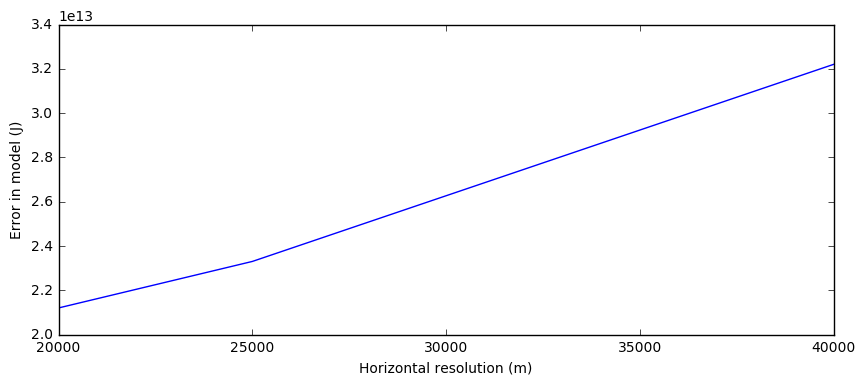

In [2]:
main.main(TaskD2 = True)

Figure 6: Plot of the error calculated from the difference fields between the model in the steady state and the steady state analytic solution from Mushgrave (1985) against horizontal resolution in the model.

This is displayed in Figure 6, which shows that as the model resolution is improved (ie. horizontal resolution decreased), the energy difference decreases and it tends towards the exact solution. The plot also shows that the decrease is almost linear, but further experiments need to be carried out to determine the order of convergence.

## Task E

The model is modified to use a semi-Lagrangian method to solve the full non-linear shallow water equations, instead of the linearised shallow water equations mentioned in the introduction. 

The SWE are rederived without linearising over a basic state:

$$\frac{Dh}{Dt} + h\Big(\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y}\Big)=0  \qquad (8)$$

$$\frac{Du}{Dt} - fv = -g\frac{\partial h}{\partial x} - \gamma u +\frac{\tau_x}{\rho H}  \qquad (9)$$

$$\frac{Dv}{Dt} + fv = -g\frac{\partial h}{\partial y} - \gamma v +\frac{\tau_y}{\rho H}  \qquad (10)$$

Since $h = H + \eta$ and the magnitude of $\eta$ is very small compared to $H$, $h \approx H$, $\frac{\partial h}{\partial x} = \frac{\partial \eta}{\partial x}$ and $\frac{\partial h}{\partial y} = \frac{\partial \eta}{\partial y}$ is assumed for simplicity. Given these assumptions, the full non-linear shallow water equations are solved with a semi-Lagrangian method using a trapezoidal scheme below:

$$\eta^{n+1}_{ij} = \eta(\tilde x^n_{ij},t^n) - \frac{\Delta t}{2}H\Big (\underbrace{\frac{\partial u^n}{\partial x} + \frac{\partial v^n}{\partial y}}_\text{at $x_{ij}$} + \underbrace{\frac{\partial u^n}{\partial x} + \frac{\partial v^n}{\partial y}}_\text{at departure point $\tilde x^n_{ij}$}\Big) \qquad (11)$$

$$u^{n+1}_{ij} = \Big (\frac{\gamma \Delta t}{2} + 1\Big)^{-1}\Bigg(u(\tilde x^n_{ij},t^n) + \frac{\Delta t}{2}\Big [\underbrace{(f_0 +\beta y)v^n - g\frac{\partial \eta^{n+1}}{\partial x} + \frac{\tau_x}{\rho H}}_\text{at $x_{ij}$} + \underbrace{(f_0 + \beta y)v^n - g\frac{\partial \eta^n}{\partial x} - \gamma u^n + \frac{\tau_x}{\rho H}}_\text{at departure point $\tilde x^n_{ij}$} \Big] \Bigg )\qquad (12)$$ 

$$v^{n+1}_{ij} = \Big (\frac{\gamma \Delta t}{2} + 1\Big)^{-1}\Bigg(v(\tilde x^n_{ij},t^n) + \frac{\Delta t}{2}\Big [\underbrace{-(f_0 +\beta y)u^{n+1} - g\frac{\partial \eta^{n+1}}{\partial y} + \frac{\tau_y}{\rho H}}_\text{at $x_{ij}$} - \underbrace{(f_0 + \beta y)u^n - g\frac{\partial \eta^n}{\partial y} - \gamma v^n + \frac{\tau_y}{\rho H}}_\text{at departure point $\tilde x^n_{ij}$} \Big] \Bigg )\qquad (13)$$ 

where the departure point () is calculated using the two stage midpoint method:

$$x_* = x^{n+1}_{ij} - u(x^{n+1}_{ij},t^n)\frac{\Delta t}{2}  \qquad (14)$$ 
$$\tilde x^n_{ij} = x^{n+1}_{ij} - u(x_*,t^{n+\frac{1}{2}})\Delta t \qquad (15)$$

with extrapolation to time level $n + \frac{1}{2}$ using 2 time levels $n$ and $n-1$:

$$u(x_*,t^{n+\frac{1}{2}}) = \frac{3}{2}u(x_*,t^n) - \frac{1}{2}u(x_*,t^{n-1})   \qquad (16)$$

The order which the momentum equations are solved is reversed every other timestep, following the forward-backward time scheme done in Task B. The non-linear model is run for 1 day to compare with the results from Task B (linear model).


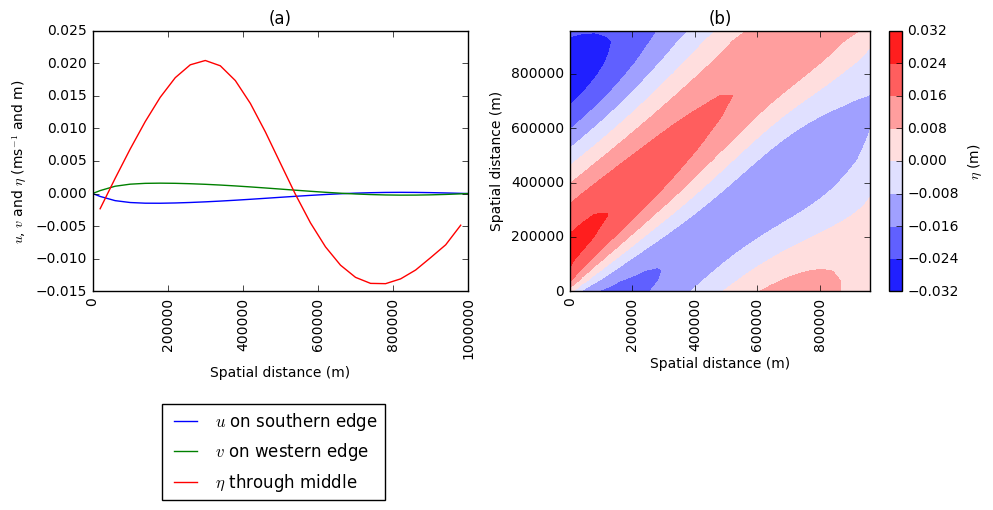

In [3]:
main.main2(TaskE1 = True)

Figure 7: (a) Plot of $u$ against $x$ along the grid closest to the southern edge of the basin, $v$ against $y$ along the grid closest to the western edge of the basin, $\eta$ against $x$ through the middle of the gyre and (b) contour plot of $\eta$ in the ocean basin. Model is run for 1 day ($nt = 576$, $\Delta t = 150s$) with $L = 10^6$, $d = 40000m$, $H = 1000m$, $g = 10 ms^{-2}$, $\gamma = 10^{-6}s^{-1}$, $\rho = 1000 kgm^{-3}$, $\tau_0 = 0.2 Nm^{-2}$ with boundary conditions and initial conditions stated in description of model. The semi-Lagrangian model described above is used.

The solution initially starts off very similar to the model using the linearised SWEs in Task B (not shown here), with the plots looking similar for the first 10 timesteps. However, the semi-Langrangian model starts to produce an asymmetric plot. There is no gyre produced so the semi-Lagrangian model is not performing as expected. The use of the semi-Lagrangian model allows the CFL criterion restriction on the timestep to be lifted. Hence, larger timesteps can be picked without producing an unstable solution. 

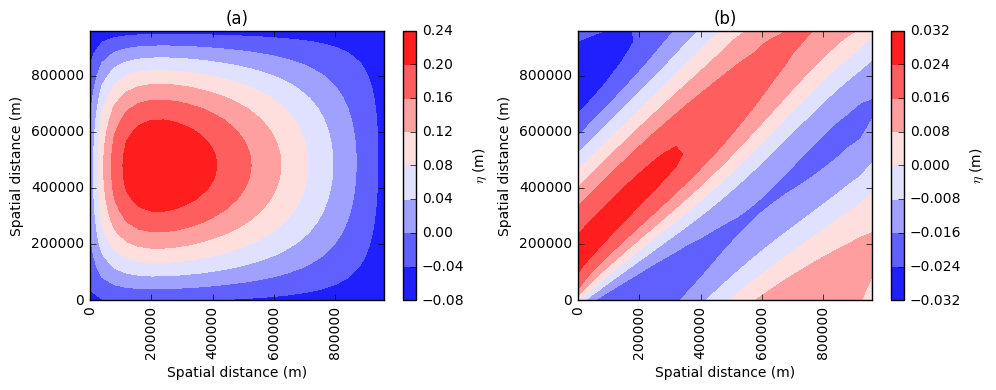

In [2]:
main.main2(TaskE2 = True)

Figure 8: Contour plot of (a) the steady state analytical solution from Mushgrave (1985) and (b) steady state model solution of $\eta$ in the ocean basin. Model is run for 1 day ($nt = 576 \times 30$, $\Delta t = 150s$) with $L = 10^6$, $d = 40000m$, $H = 1000m$, $g = 10 ms^{-2}$, $\gamma = 10^{-6}s^{-1}$, $\rho = 1000 kgm^{-3}$, $\tau_0 = 0.2 Nm^{-2}$ with boundary conditions and initial conditions stated in description of model. The semi-Lagrangian model described above is used.

The two plots are vastly different, mainly because the semi-Lagrangian model did not function as expected.

## Conclusion

In this project, a finite difference numerical model is devised using the forward-backward time scheme and linearised SWEs on the Arakawa C-grid to explore the wind-driven circulation in a closed ocean basin. The model is used to understand the development of ocean gyres with a western boundary current in a closed ocean basin as a result of wind forcing. Also, the impact of improving model resolution on the model error is investigated. 

The model using the linearised SWEs is realistic in generating the asymmetric ocean gyre and western boundary current when it approaches the steady state after about 30 days. There is a basin-wide negative bias in the model when total energy is used as a measure, with the greatest bias occuring at the western boundary current. This shows that the model is producing velocity fields which are too weak throughout the ocean basin. When the model resolution is increased, the model performs slightly better, with the error in the model decreasing almost linearly.

The semi-Lagrangian model did not function as expected. Nevertheless, the fact that the Eulerian model of Stommel is able to represent the flow structure similar to the analytical solution means that the semi-Lagrangian model should be able to replicate the same flow structure, if constructed accurately. The benefit of the semi-Lagrangian model is that the CFL criterion restriction on the timestep can be lifted. Future work can be done in this aspect to accurately construct the model.

## References

Beckers, J. and Deleersnijder, E. (1993). Stability of a FBTCS scheme applied to the propagation of shallow-water inertia-gravity waves on various grids. <i>J. Computational Phys.</i>, <b>108</b>, 95–104. 

Matsuno, T. (1966). A finite difference scheme for time integrations of oscillatory equations with second order accuracy and sharp cutoff for high frequencies. <i>J. Meteorol. Soc. Japan</i>, <b>44</b>, 85–88. 

Mushgrave, D. (1985). A numerical study of the roles of subgyre-scale mixing and the western boundary current on homogenisation of a passive tracer. <i>J. Geophys. Res.</i>, <b>90</b>, 7037–7043.

Stommel, H. (1948). The westward intensiﬁcation of wind-driven ocean currents. <i>Trans. Am. Geophys. Union</i>, <b>29</b>, 202–206.
